In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [2]:
from tensorflow.keras.layers import Dense, Activation, Conv2D,Conv1D, Flatten,MaxPooling2D,BatchNormalization,Lambda, AveragePooling2D, MaxPooling1D
import tensorflow.keras.backend as K
from tensorflow.keras.layers import LSTM,Input,Bidirectional,Dense, Conv1D,MaxPooling1D,Flatten,Dropout,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras

In [3]:
df_X = pd.read_csv('dataset/train_features.csv')
df_y = pd.read_csv('dataset/train_target.csv')

In [4]:
def data_processing(data_frame,feature_list,conc_list=list()):
    for feature in feature_list:
        conc_list.append(np.asarray(data_frame[feature]).reshape(-1,375,1))
    conc_array = np.concatenate(conc_list,axis=2)
    array = conc_array.transpose(0,1,2)
    return array

In [5]:
data = data_processing(df_X,['S1','S2','S3','S4'])

In [6]:
y = df_y.drop(['id','V','M'],axis=1)
y_numpy = y.to_numpy()
y_list = y_numpy.tolist()

In [7]:
x_array = data
y_array = y_list
train_test_index = int(len(x_array)*0.8)
zip_list = list(zip(x_array,y_array))
random.shuffle(zip_list)
x_array,y_array = zip(*zip_list)
x_train,y_train = np.array(x_array[0:train_test_index]),np.array(y_array[0:train_test_index])
x_test,y_test = np.array(x_array[train_test_index:]),np.array(y_array[train_test_index:])

In [8]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(-1, 1))
y_train_scaled = Scaler.fit_transform(y_train)
y_test_scaled = Scaler.fit_transform(y_test)
y_train_scaled.shape

(2240, 2)

In [15]:
model= Sequential(
    [
        Input(shape=(x_train.shape[1],x_train.shape[2])),
        # Use a Rescaling layer to make sure input values are in the [0, 1] range.
        # The original images have shape (28, 28), so we reshape them to (28, 28, 1)
        # Follow-up with a classic small convnet
        Conv1D(32, 2, activation="relu"),
        BatchNormalization(),
        MaxPooling1D(3),
        Conv1D(32,2, activation="relu"),
        MaxPooling1D(2),
        Conv1D(32,2, activation="relu"),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(16, activation="relu"),
        Dense(2, activation='tanh')
    ]
)

In [16]:
def my_loss(y_true, y_pred):
    return K.mean(K.square(y_true-y_pred))/2e+04

In [17]:
model.compile(loss=my_loss,optimizer='adam',metrics=['mean_absolute_error'])

In [18]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor ="val_mean_absolute_error", 
                                        mode ="min", patience = 50, 
                                        restore_best_weights = True)

In [19]:
history = model.fit(x_train,y_train_scaled,validation_split=0.2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
56/56 [==============================] - 2s 17ms/step - loss: 1.7170e-05 - mean_absolute_error: 0.4830 - val_loss: 8.6963e-06 - val_mean_absolute_error: 0.3239
Epoch 2/500
56/56 [==============================] - 1s 13ms/step - loss: 6.1704e-06 - mean_absolute_error: 0.2725 - val_loss: 3.9359e-06 - val_mean_absolute_error: 0.2141
Epoch 3/500
56/56 [==============================] - ETA: 0s - loss: 3.2910e-06 - mean_absolute_error: 0.191 - 1s 13ms/step - loss: 3.2799e-06 - mean_absolute_error: 0.1910 - val_loss: 2.5810e-06 - val_mean_absolute_error: 0.1681
Epoch 4/500
56/56 [==============================] - ETA: 0s - loss: 1.9131e-06 - mean_absolute_error: 0.1434- ETA: 0s - loss: 1.9221e-06 - mean_absolute_error: - 1s 13ms/step - loss: 1.9126e-06 - mean_absolute_error: 0.1434 - val_loss: 1.8768e-06 - val_mean_absolute_error: 0.1424
Epoch 5/500
56/56 [==============================] - 1s 13ms/step - loss: 1.4749e-06 - mean_absolute_error: 0.1267 - val_loss: 1.3642e-06 - val_

56/56 [==============================] - 1s 15ms/step - loss: 8.8699e-08 - mean_absolute_error: 0.0315 - val_loss: 2.0210e-07 - val_mean_absolute_error: 0.0437
Epoch 48/500
56/56 [==============================] - 1s 16ms/step - loss: 8.2797e-08 - mean_absolute_error: 0.0310 - val_loss: 1.9693e-07 - val_mean_absolute_error: 0.0426
Epoch 49/500
56/56 [==============================] - 1s 16ms/step - loss: 9.1416e-08 - mean_absolute_error: 0.0314 - val_loss: 2.0136e-07 - val_mean_absolute_error: 0.0430
Epoch 50/500
56/56 [==============================] - 1s 16ms/step - loss: 8.3157e-08 - mean_absolute_error: 0.0305 - val_loss: 2.1109e-07 - val_mean_absolute_error: 0.0444
Epoch 51/500
56/56 [==============================] - ETA: 0s - loss: 8.4132e-08 - mean_absolute_error: 0.031 - 1s 15ms/step - loss: 8.4479e-08 - mean_absolute_error: 0.0311 - val_loss: 2.2217e-07 - val_mean_absolute_error: 0.0450
Epoch 52/500
56/56 [==============================] - 1s 15ms/step - loss: 8.6760e-08 - me

56/56 [==============================] - 1s 17ms/step - loss: 5.4447e-08 - mean_absolute_error: 0.0250 - val_loss: 1.4331e-07 - val_mean_absolute_error: 0.0341
Epoch 95/500
56/56 [==============================] - 1s 16ms/step - loss: 4.3056e-08 - mean_absolute_error: 0.0226 - val_loss: 1.5236e-07 - val_mean_absolute_error: 0.0371
Epoch 96/500
56/56 [==============================] - 1s 16ms/step - loss: 4.8152e-08 - mean_absolute_error: 0.0235 - val_loss: 1.4374e-07 - val_mean_absolute_error: 0.0338
Epoch 97/500
56/56 [==============================] - 1s 15ms/step - loss: 4.2386e-08 - mean_absolute_error: 0.0220 - val_loss: 1.5346e-07 - val_mean_absolute_error: 0.0359
Epoch 98/500
56/56 [==============================] - 1s 15ms/step - loss: 4.9927e-08 - mean_absolute_error: 0.0235 - val_loss: 1.3516e-07 - val_mean_absolute_error: 0.0342
Epoch 99/500
56/56 [==============================] - 1s 15ms/step - loss: 4.2271e-08 - mean_absolute_error: 0.0219 - val_loss: 1.4518e-07 - val_mea

Epoch 141/500
56/56 [==============================] - 1s 16ms/step - loss: 3.5808e-08 - mean_absolute_error: 0.0196 - val_loss: 1.1661e-07 - val_mean_absolute_error: 0.0303
Epoch 142/500
56/56 [==============================] - 1s 16ms/step - loss: 3.0749e-08 - mean_absolute_error: 0.0184 - val_loss: 1.2208e-07 - val_mean_absolute_error: 0.0309
Epoch 143/500
56/56 [==============================] - 1s 16ms/step - loss: 3.3272e-08 - mean_absolute_error: 0.0193 - val_loss: 1.3591e-07 - val_mean_absolute_error: 0.0321
Epoch 144/500
56/56 [==============================] - 1s 17ms/step - loss: 2.9307e-08 - mean_absolute_error: 0.0180 - val_loss: 1.2300e-07 - val_mean_absolute_error: 0.0306
Epoch 145/500
56/56 [==============================] - 1s 16ms/step - loss: 3.2722e-08 - mean_absolute_error: 0.0191 - val_loss: 1.3198e-07 - val_mean_absolute_error: 0.0327
Epoch 146/500
56/56 [==============================] - 1s 16ms/step - loss: 2.9134e-08 - mean_absolute_error: 0.0180 - val_loss: 1

Epoch 188/500
56/56 [==============================] - 1s 15ms/step - loss: 1.8071e-08 - mean_absolute_error: 0.0144 - val_loss: 1.1412e-07 - val_mean_absolute_error: 0.0284
Epoch 189/500
56/56 [==============================] - 1s 16ms/step - loss: 2.0132e-08 - mean_absolute_error: 0.0152 - val_loss: 1.1383e-07 - val_mean_absolute_error: 0.0288
Epoch 190/500
56/56 [==============================] - 1s 16ms/step - loss: 2.0601e-08 - mean_absolute_error: 0.0151 - val_loss: 1.1053e-07 - val_mean_absolute_error: 0.0277
Epoch 191/500
56/56 [==============================] - 1s 15ms/step - loss: 2.3550e-08 - mean_absolute_error: 0.0163 - val_loss: 1.1037e-07 - val_mean_absolute_error: 0.0280
Epoch 192/500
56/56 [==============================] - 1s 15ms/step - loss: 2.1876e-08 - mean_absolute_error: 0.0156 - val_loss: 1.0998e-07 - val_mean_absolute_error: 0.0281
Epoch 193/500
56/56 [==============================] - 1s 15ms/step - loss: 2.1201e-08 - mean_absolute_error: 0.0157 - val_loss: 1

56/56 [==============================] - 1s 19ms/step - loss: 1.8481e-08 - mean_absolute_error: 0.0143 - val_loss: 1.1508e-07 - val_mean_absolute_error: 0.0285
Epoch 236/500
56/56 [==============================] - 1s 16ms/step - loss: 2.1334e-08 - mean_absolute_error: 0.0152 - val_loss: 1.0799e-07 - val_mean_absolute_error: 0.0269
Epoch 237/500
56/56 [==============================] - 1s 18ms/step - loss: 1.8661e-08 - mean_absolute_error: 0.0144 - val_loss: 1.1460e-07 - val_mean_absolute_error: 0.0277
Epoch 238/500
56/56 [==============================] - 1s 18ms/step - loss: 1.5785e-08 - mean_absolute_error: 0.0133 - val_loss: 1.1821e-07 - val_mean_absolute_error: 0.0298
Epoch 239/500
56/56 [==============================] - 1s 21ms/step - loss: 2.1872e-08 - mean_absolute_error: 0.0159 - val_loss: 1.1360e-07 - val_mean_absolute_error: 0.0278
Epoch 240/500
56/56 [==============================] - 1s 17ms/step - loss: 2.4562e-08 - mean_absolute_error: 0.0163 - val_loss: 1.0535e-07 - va

56/56 [==============================] - 1s 19ms/step - loss: 1.5608e-08 - mean_absolute_error: 0.0134 - val_loss: 1.0825e-07 - val_mean_absolute_error: 0.0264
Epoch 283/500
56/56 [==============================] - 1s 16ms/step - loss: 1.5498e-08 - mean_absolute_error: 0.0133 - val_loss: 1.1158e-07 - val_mean_absolute_error: 0.0269
Epoch 284/500
56/56 [==============================] - 1s 18ms/step - loss: 1.3710e-08 - mean_absolute_error: 0.0125 - val_loss: 1.0198e-07 - val_mean_absolute_error: 0.0258
Epoch 285/500
56/56 [==============================] - 1s 17ms/step - loss: 1.7338e-08 - mean_absolute_error: 0.0138 - val_loss: 1.0372e-07 - val_mean_absolute_error: 0.0262
Epoch 286/500
56/56 [==============================] - 1s 18ms/step - loss: 1.5032e-08 - mean_absolute_error: 0.0130 - val_loss: 9.9204e-08 - val_mean_absolute_error: 0.0257
Epoch 287/500
56/56 [==============================] - 1s 19ms/step - loss: 1.4881e-08 - mean_absolute_error: 0.0126 - val_loss: 1.0664e-07 - va

56/56 [==============================] - 1s 17ms/step - loss: 1.2566e-08 - mean_absolute_error: 0.0118 - val_loss: 1.0105e-07 - val_mean_absolute_error: 0.0250
Epoch 330/500
56/56 [==============================] - 1s 16ms/step - loss: 1.1861e-08 - mean_absolute_error: 0.0115 - val_loss: 1.0553e-07 - val_mean_absolute_error: 0.0259
Epoch 331/500
56/56 [==============================] - 1s 17ms/step - loss: 1.2423e-08 - mean_absolute_error: 0.0117 - val_loss: 9.4262e-08 - val_mean_absolute_error: 0.0249
Epoch 332/500
56/56 [==============================] - 1s 17ms/step - loss: 1.3244e-08 - mean_absolute_error: 0.0122 - val_loss: 1.0102e-07 - val_mean_absolute_error: 0.0259
Epoch 333/500
56/56 [==============================] - 1s 17ms/step - loss: 1.4509e-08 - mean_absolute_error: 0.0127 - val_loss: 9.8125e-08 - val_mean_absolute_error: 0.0246
Epoch 334/500
56/56 [==============================] - 1s 17ms/step - loss: 1.3365e-08 - mean_absolute_error: 0.0120 - val_loss: 9.6670e-08 - va

56/56 [==============================] - 1s 15ms/step - loss: 1.1747e-08 - mean_absolute_error: 0.0113 - val_loss: 9.7369e-08 - val_mean_absolute_error: 0.0246
Epoch 377/500
56/56 [==============================] - 1s 15ms/step - loss: 1.1320e-08 - mean_absolute_error: 0.0113 - val_loss: 9.2604e-08 - val_mean_absolute_error: 0.0240
Epoch 378/500
56/56 [==============================] - 1s 15ms/step - loss: 1.0441e-08 - mean_absolute_error: 0.0108 - val_loss: 9.9555e-08 - val_mean_absolute_error: 0.0248
Epoch 379/500
56/56 [==============================] - 1s 15ms/step - loss: 1.2136e-08 - mean_absolute_error: 0.0115 - val_loss: 9.7334e-08 - val_mean_absolute_error: 0.0244
Epoch 380/500
56/56 [==============================] - 1s 16ms/step - loss: 1.3118e-08 - mean_absolute_error: 0.0122 - val_loss: 9.6087e-08 - val_mean_absolute_error: 0.0245
Epoch 381/500
56/56 [==============================] - 1s 15ms/step - loss: 1.1589e-08 - mean_absolute_error: 0.0113 - val_loss: 9.9980e-08 - va

56/56 [==============================] - 1s 17ms/step - loss: 9.8959e-09 - mean_absolute_error: 0.0104 - val_loss: 9.0071e-08 - val_mean_absolute_error: 0.0233
Epoch 424/500
56/56 [==============================] - 1s 17ms/step - loss: 1.1224e-08 - mean_absolute_error: 0.0113 - val_loss: 9.5302e-08 - val_mean_absolute_error: 0.0247
Epoch 425/500
56/56 [==============================] - 1s 18ms/step - loss: 9.8386e-09 - mean_absolute_error: 0.0105 - val_loss: 8.9065e-08 - val_mean_absolute_error: 0.0235
Epoch 426/500
56/56 [==============================] - 1s 17ms/step - loss: 1.1085e-08 - mean_absolute_error: 0.0109 - val_loss: 9.7656e-08 - val_mean_absolute_error: 0.0253
Epoch 427/500
56/56 [==============================] - 1s 17ms/step - loss: 1.1007e-08 - mean_absolute_error: 0.0111 - val_loss: 9.0690e-08 - val_mean_absolute_error: 0.0239
Epoch 428/500
56/56 [==============================] - 1s 18ms/step - loss: 1.2536e-08 - mean_absolute_error: 0.0117 - val_loss: 9.1609e-08 - va

Epoch 470/500
56/56 [==============================] - 1s 17ms/step - loss: 9.6848e-09 - mean_absolute_error: 0.0103 - val_loss: 9.0298e-08 - val_mean_absolute_error: 0.0231
Epoch 471/500
56/56 [==============================] - 1s 18ms/step - loss: 8.7898e-09 - mean_absolute_error: 0.0099 - val_loss: 9.2346e-08 - val_mean_absolute_error: 0.0234
Epoch 472/500
56/56 [==============================] - 1s 17ms/step - loss: 1.1813e-08 - mean_absolute_error: 0.0113 - val_loss: 8.9398e-08 - val_mean_absolute_error: 0.0231
Epoch 473/500
56/56 [==============================] - 1s 19ms/step - loss: 1.1134e-08 - mean_absolute_error: 0.0111 - val_loss: 9.1573e-08 - val_mean_absolute_error: 0.0238
Epoch 474/500
56/56 [==============================] - 1s 18ms/step - loss: 1.0279e-08 - mean_absolute_error: 0.0104 - val_loss: 8.9116e-08 - val_mean_absolute_error: 0.0231
Epoch 475/500
56/56 [==============================] - 1s 17ms/step - loss: 8.3104e-09 - mean_absolute_error: 0.0096 - val_loss: 8

In [20]:
model.evaluate(x_test,y_test_scaled)

18/18 [==============================] - 0s 4ms/step - loss: 9.8738e-08 - mean_absolute_error: 0.0229


[9.873787831793379e-08, 0.022935807704925537]

<function matplotlib.pyplot.show(close=None, block=None)>

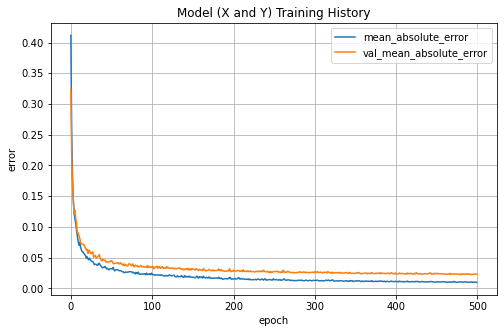

In [26]:
del history.history["loss"]
del history.history["val_loss"]
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("epoch")
plt.ylabel('error')
plt.title("Model (X and Y) Training History")
plt.grid(True)
plt.show

In [153]:
ans = model.predict(np.expand_dims(x_test[0],axis=0))

In [154]:
ans[0]

array([-0.50616276, -0.5333452 ], dtype=float32)

In [155]:
model.save('model/model_xny.h5')